In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings ('ignore')

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
dataframe = pd.read_csv ('converted_data.csv')

In [ ]:
dataframe.head()

,Unnamed: 0,Compatibility,Quality,Tech_generation,Upgrade,Manufacturing,Maintenance,Product_Value,Durability,Product,Risk
0,0,67,high,2,easy,NaN,easy,1169,6,metal_powder,good
1,1,22,low,2,easy,easy,normal,5951,48,metal_powder,bad
2,2,49,high,1,easy,easy,NaN,2096,12,process_dev,good
3,3,45,high,2,normal,easy,easy,7882,42,waste_mngmt,good
4,4,53,high,2,normal,easy,easy,4870,24,plasma_torch,bad


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1000 non-null   int64 
 1   Compatibility    1000 non-null   int64 
 2   Quality          1000 non-null   object
 3   Tech_generation  1000 non-null   int64 
 4   Upgrade          1000 non-null   object
 5   Manufacturing    817 non-null    object
 6   Maintenance      606 non-null    object
 7   Product_Value    1000 non-null   int64 
 8   Durability       1000 non-null   int64 
 9   Product          1000 non-null   object
 10  Risk             1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
print ('Unique value of Quality\n', dataframe['Quality'].unique())
print ('Unique value of Tech generation\n', dataframe['Tech_generation'].unique())
print ('Unique value of Upgrade level\n', dataframe['Upgrade'].unique())
print ('Unique value of Manufacturing level\n', dataframe['Manufacturing'].unique())
print ('Unique value of Maintenance\n', dataframe['Maintenance'].unique())
print ('Unique value of Products\n', dataframe['Product'].unique())

Unique value of Quality
 ['high' 'low']
Unique value of Tech generation
 [2 1 3 0]
Unique value of Upgrade level
 ['easy' 'normal' 'hard']
Unique value of Manufacturing level
 [nan 'easy' 'quite hard' 'hard' 'normal']
Unique value of Maintenance
 ['easy' 'normal' nan 'hard']
Unique value of Products
 ['metal_powder' 'process_dev' 'waste_mngmt' 'plasma_torch' 'drosrite'
 'other3' 'other2' 'other1']


In [ ]:
dataframe[['Compatibility', 'Durability','Product_Value']].describe()

,Compatibility,Durability,Product_Value
count,1000.000000,1000.000000,1000.000000
mean,35.546000,20.903000,3271.258000
std,11.375469,12.058814,2822.736876
min,19.000000,4.000000,250.000000
25%,27.000000,12.000000,1365.500000
50%,33.000000,18.000000,2319.500000
75%,42.000000,24.000000,3972.250000
max,75.000000,72.000000,18424.000000


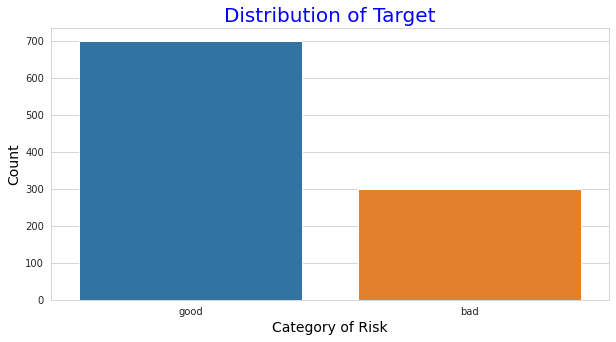

In [ ]:
#Check distribution of target
sns.set_style (style = "whitegrid")
plt.figure(figsize = (10, 5))
sns.countplot(dataframe['Risk'])
plt.title('Distribution of Target', color = 'blue', loc = 'center', fontsize = 20)
plt.xlabel('Category of Risk', color = 'black', fontsize = 14)
plt.ylabel('Count', color = 'black', fontsize = 14)
plt.show()

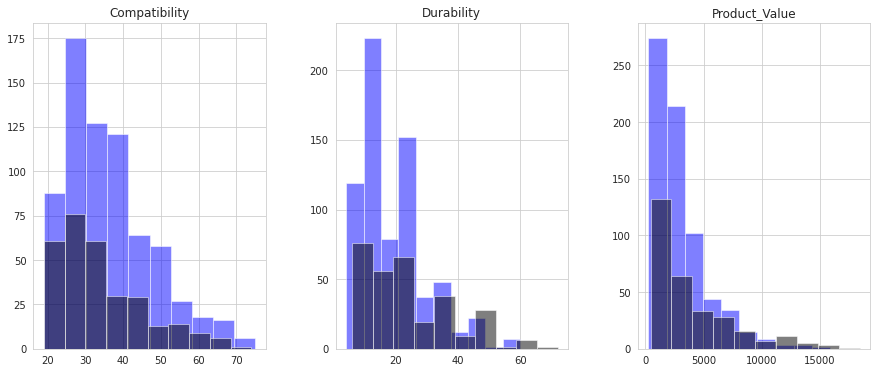

In [ ]:
#Check Distribution of numeric features
numeric_features = ['Compatibility', 'Durability','Product_Value']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
dataframe[numeric_features][dataframe['Risk'] == "good"].hist(bins=10, color = 'Blue', alpha=0.5, ax = ax)
dataframe[numeric_features][dataframe['Risk'] == "bad"].hist(bins=10, color = 'Black', alpha=0.5, ax = ax)
plt.show()

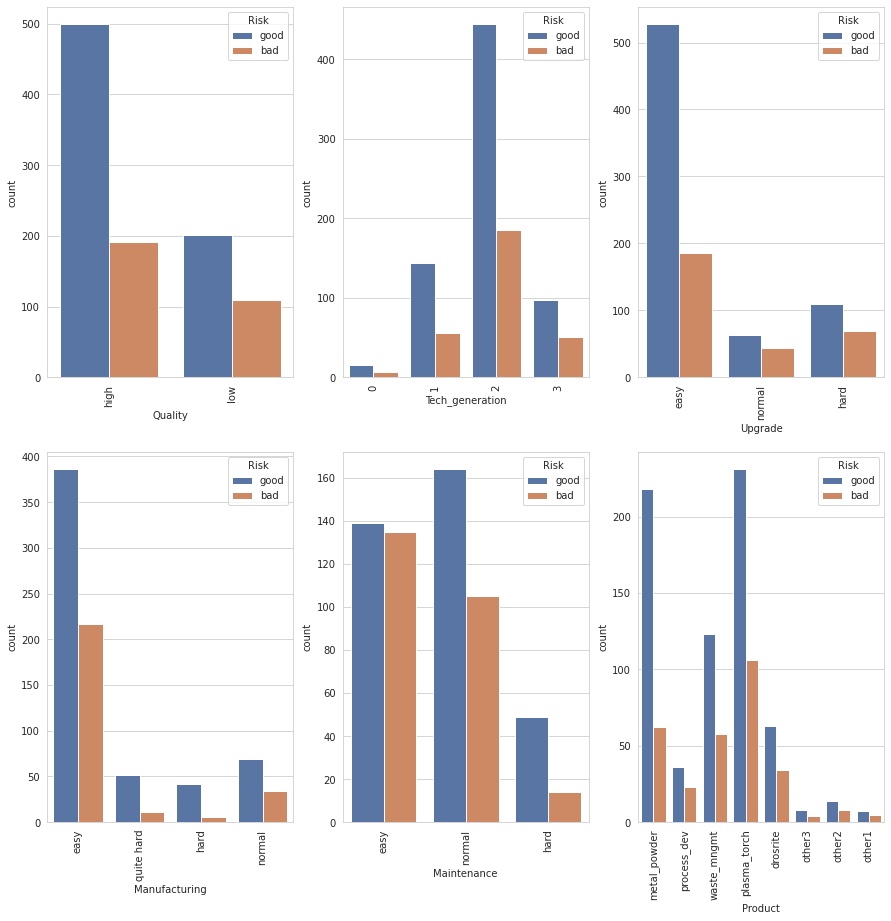

In [ ]:
#Check distribution of feature
cols = ['Quality', 'Tech_generation', 'Upgrade', 'Manufacturing','Maintenance','Product']

fig, axarr = plt.subplots(2, 3, figsize=(15, 15))
for i in cols:
    index = cols.index(i)
    plt.subplot(2, 3, index + 1)
    sns.countplot(x = i, data = dataframe, hue="Risk", palette = "deep")
    plt.xticks(rotation=90)

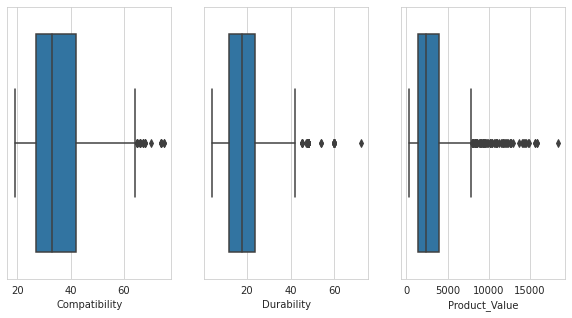

In [ ]:
#Check outlier
fig, axarr = plt.subplots(1, 3, figsize=(10, 5))
cols = ['Compatibility', 'Durability','Product_Value']
for i in cols:
    index = cols.index(i)
    plt.subplot(1,3,index + 1)
    sns.boxplot(dataframe[i])

In [ ]:
dataframe.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
#Handle Missing Value
dataframe['Manufacturing'].fillna('None', inplace = True)
dataframe['Maintenance'].fillna('None', inplace = True)

In [ ]:
print ("Before handling ordinal type feature Manufacturing", dataframe['Manufacturing'].unique())
print ('Before handling ordinal type feature Maintenance', dataframe['Maintenance'].unique())
print ('Before handling ordinal type feature Risk', dataframe['Risk'].unique())

Before handling ordinal type feature Manufacturing ['None' 'easy' 'quite hard' 'hard' 'normal']
Before handling ordinal type feature Maintenance ['easy' 'normal' 'None' 'hard']
Before handling ordinal type feature Risk ['good' 'bad']


In [ ]:
le = LabelEncoder()
dataframe['Manufacturing'] = le.fit_transform(dataframe['Manufacturing'])
dataframe['Maintenance'] = le.fit_transform(dataframe['Maintenance'])
dataframe['Risk'] = le.fit_transform(dataframe['Risk'])
print ('After handling ordinal type feature Manufacturing', dataframe['Manufacturing'].unique())
print ('After handling ordinal type feature Maintenance', dataframe['Maintenance'].unique())
print ('After handling ordinal type feature Risk', dataframe['Risk'].unique())

After handling ordinal type feature Manufacturing [0 1 4 2 3]
After handling ordinal type feature Maintenance [1 3 0 2]
After handling ordinal type feature Risk [1 0]


In [ ]:
#Change data type Job
dataframe['Tech_generation'] = dataframe['Tech_generation'].astype(object)

In [ ]:
#Handling outlier
Q1 = (dataframe[['Compatibility', 'Durability','Product_Value']]).quantile(0.25)
Q3 = (dataframe[['Compatibility', 'Durability','Product_Value']]).quantile(0.75)

IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q3 - (1.5*IQR)

more_than = (dataframe[['Compatibility', 'Durability','Product_Value']] > maximum)
lower_than = (dataframe[['Compatibility', 'Durability','Product_Value']] < minimum)

dataframe[['Compatibility', 'Durability','Product_Value']] = dataframe[['Compatibility', 'Durability','Product_Value']].mask(more_than, maximum, axis=1)
dataframe[['Compatibility', 'Durability','Product_Value']] = dataframe[['Compatibility', 'Durability','Product_Value']].mask(lower_than, minimum, axis=1)

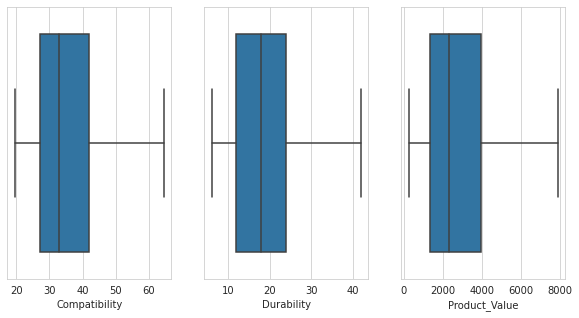

In [ ]:
fig, axarr = plt.subplots(1, 3, figsize=(10, 5))
cols = ['Compatibility', 'Durability','Product_Value']
for i in cols:
    index = cols.index(i)
    plt.subplot(1,3,index + 1)
    sns.boxplot(dataframe[i])

In [ ]:
#One Hot Encoding
dataframe = pd.get_dummies(dataframe)

In [ ]:
#Spliting Dataframe
X = dataframe.drop('Risk', axis = 1)
y = dataframe['Risk']

In [ ]:
dataframe.head()

,Compatibility,Manufacturing,Maintenance,Product_Value,Durability,Risk,Quality_high,Quality_low,Tech_generation_0,Tech_generation_1,Tech_generation_2,Tech_generation_3,Upgrade_easy,Upgrade_hard,Upgrade_normal,Product_drosrite,Product_metal_powder,Product_other1,Product_other2,Product_other3,Product_plasma_torch,Product_process_dev,Product_waste_mngmt
0,64.5,0,1,1169.0,6,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,22.0,1,3,5951.0,42,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,49.0,1,0,2096.0,12,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
3,45.0,1,1,7882.0,42,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,53.0,1,1,4870.0,24,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_total = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
from keras.layers import Dropout
from keras.regularizers import l2
import keras as kp
opt = kp.optimizers.Adam(learning_rate=0.0075)

In [ ]:
ann.add(tf.keras.layers.Dense(units=27, activation='relu')) #,kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))

In [ ]:
ann.add(Dropout(0.2))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = opt, loss = 'mean_squared_error')

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 300)

Epoch 1/300
19/19 [==============================] - 0s 1ms/step - loss: 0.1074
Epoch 2/300
19/19 [==============================] - 0s 1ms/step - loss: 0.1016
Epoch 3/300
19/19 [==============================] - 0s 1ms/step - loss: 0.1026
Epoch 4/300
19/19 [==============================] - 0s 1ms/step - loss: 0.0988
Epoch 5/300
19/19 [==============================] - 0s 1ms/step - loss: 0.1018
Epoch 6/300
19/19 [==============================] - 0s 1ms/step - loss: 0.1019
Epoch 7/300
19/19 [==============================] - 0s 1ms/step - loss: 0.1048
Epoch 8/300
19/19 [==============================] - 0s 1ms/step - loss: 0.1025
Epoch 9/300
19/19 [==============================] - 0s 1ms/step - loss: 0.0964
Epoch 10/300
19/19 [==============================] - 0s 1ms/step - loss: 0.1053
Epoch 11/300
19/19 [==============================] - 0s 1ms/step - loss: 0.1017
Epoch 12/300
19/19 [==============================] - 0s 1ms/step - loss: 0.0943
Epoch 13/300
19/19 [=================

In [ ]:
y_pred_test = ann.predict(X_test)
y_pred_train = ann.predict(X_train)
y_pred_total = ann.predict(X_total)
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_pred_test = (y_pred_test>0.5)
y_pred_train = (y_pred_train>0.5)
y_pred_total = (y_pred_total>0.5)

In [ ]:
print ('Accuracy of model based on testing set is:', 100*accuracy_score(y_test, y_pred_test))
print ('Accuracy of model based on training set is:', 100*accuracy_score(y_train, y_pred_train))
print ('Accuracy of model based on total is:', 100*accuracy_score(y, y_pred_total))

Accuracy of model based on testing set is: 71.75
Accuracy of model based on training set is: 93.83333333333333
Accuracy of model based on total is: 84.8


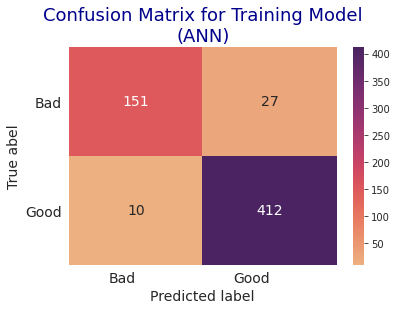

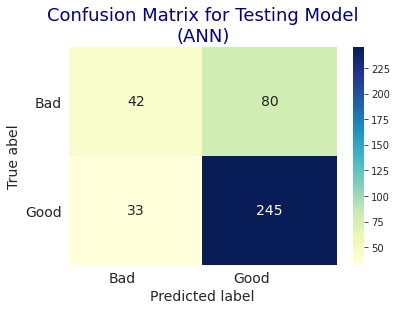

In [ ]:
# Form confusion matrix as a DataFrame
confusion_matrix_train_df = pd.DataFrame((confusion_matrix(y_train, y_pred_train)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_train_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='flare')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(ANN)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

confusion_matrix_testing_df = pd.DataFrame((confusion_matrix(y_test, y_pred_test)), ('Bad', 'Good'), ('Bad', 'Good'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_testing_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(ANN)', fontsize=18, color='darkblue')
plt.ylabel('True abel', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()


In [ ]:
confusion_matrix_train_df

,Bad,Good
Bad,143,35
Good,5,417


In [ ]:
confusion_matrix_testing_df

,Bad,Good
Bad,46,76
Good,39,239
